# Visualizing inferred models in Tracts with demes

## Motivation

In [86]:
import demes
import demesdraw
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown as md
def print_model(file_path):
    with open(file_path) as f:
        lines = f.read()
    return md("```yaml\n" + lines + "```")

## Three populations model

With the Tracts model [ccx_xxp](../../../analysis-doc/210619-TRACTS-ccx_xxp/) we inferred the following parameters:

- 

In [81]:
mig_mat = np.loadtxt("../../../analysis-doc/210619-TRACTS-ccx_xxp/results/boot0_-295.79_mig")
print(mig_mat.round(3))

[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.03 ]
 [0.053 0.055 0.063]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.053 0.055 0.   ]
 [0.491 0.509 0.   ]]


## Specifying the model with Demes

In [92]:
mdl_yml = "./mx-admx-3pops.yaml"
mx_admx = demes.load(mdl_yml)
print_model(mdl_yml)

```yaml
# this is a comment
description:
    Model for admixture in Mexico, this model was estimated with
    tracts using a ccx_xxp model.
time_units: generations
generation_time: 29
demes:
- name: YRI
  description: Yoruba in Ibadan, Nigeria
  epochs:
  - start_size: 50000
    end_time: 0
- name: IBS
  description: Iberian populations in Spain (IBS).
  epochs:
  - start_size: 50000
    end_time: 0
- name: MXB
  description: Native American population in Mexico.
  epochs:
  - start_size: 20000
    end_time: 0
- name: MXL
  description: Admixed population in Mexico
  ancestors: [IBS, MXB]
  proportions: [0.4908, 0.5092]  # Obtained from Tracts
  start_time: 15
  epochs:
  - end_time: 0
    start_size: 20000
    end_size: 50000
migrations:
  - source: IBS
    dest: MXL
    rate: 0.053
  - source: MXB
    dest: MXL
    rate: 0.055
pulses:
  - source: YRI
    dest: MXL
    proportion: 0.063
    time: 11
  - source: YRI
    dest: MXL
    proportion: 0.0298
    time: 10


```

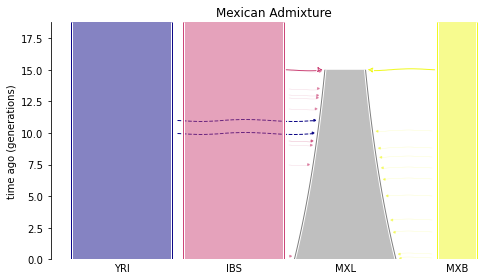

In [93]:
colors = {
    'MXB': '#f0f921ff',
    'IBS': '#cc4678ff',
    'YRI': '#0d0887ff',

}
demesdraw.tubes(mx_admx, colours=colors,title="Mexican Admixture")
plt.savefig("adm.pdf")
plt.show();